In [1]:
# Dependencies
import json
import requests
from config import api_key
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [3]:
# Settting up OpenWeather url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Adding our variables to OpenWeather
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# Define lists to hold components
names = []
cloudinesses = []
countries = []
timestamps = []
humidities = []
latitudes = []
longitudes = []
max_temperatures = []
wind_speeds = []

In [5]:
# Pulling Data
for city in cities:
    response = requests.get(query_url + city).json()
    record_number = cities.index(city)
    
    try:
        name = response["name"]
        print(f"Processing record {(record_number)+1} of {len(cities)}: {name}")
        names.append(response["name"])
        cloudinesses.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        timestamps.append(response["dt"])
        humidities.append(response["main"]["humidity"])
        latitudes.append(response["coord"]["lat"])
        longitudes.append(response["coord"]["lon"])
        max_temperatures.append(response["main"]["temp_max"])
        wind_speeds.append(response["wind"]["speed"])
    except:
        print("City not found. Skipping\n")

Processing record 1 of 626: Alofi
Processing record 2 of 626: Lasa
Processing record 3 of 626: Jamestown
Processing record 4 of 626: Rikitea
Processing record 5 of 626: Albany
Processing record 6 of 626. City not found.  Skipping...
Processing record 7 of 626: Lufilufi
Processing record 8 of 626: Langsa
Processing record 9 of 626: Yellowknife
Processing record 10 of 626: Kaitangata
Processing record 11 of 626: Mahebourg
Processing record 12 of 626: Tiksi
Processing record 13 of 626: Santa Maria
Processing record 14 of 626: Vaini
Processing record 15 of 626: Limbang
Processing record 16 of 626: Barrow
Processing record 17 of 626: Punta Arenas
Processing record 18 of 626. City not found.  Skipping...
Processing record 19 of 626: Bethel
Processing record 20 of 626: Uruzgan
Processing record 21 of 626: Nantucket
Processing record 22 of 626: Fukue
Processing record 23 of 626: Kapaa
Processing record 24 of 626: Podgornoye
Processing record 25 of 626: Atuona
Processing record 26 of 626: Berle

Processing record 202 of 626: Lompoc
Processing record 203 of 626: Provideniya
Processing record 204 of 626: Omsukchan
Processing record 205 of 626: Kavaratti
Processing record 206 of 626: Rome
Processing record 207 of 626: Port Lincoln
Processing record 208 of 626: Baykit
Processing record 209 of 626: San Bernardo
Processing record 210 of 626: Kaeo
Processing record 211 of 626. City not found.  Skipping...
Processing record 212 of 626: Sambava
Processing record 213 of 626: Aykhal
Processing record 214 of 626: Coihaique
Processing record 215 of 626: Pangobilian
Processing record 216 of 626: Muros
Processing record 217 of 626: Aden
Processing record 218 of 626: Ranong
Processing record 219 of 626: Zhigansk
Processing record 220 of 626: Strezhevoy
Processing record 221 of 626: Zima
Processing record 222 of 626: General Roca
Processing record 223 of 626: Athabasca
Processing record 224 of 626: Hermanus
Processing record 225 of 626: Bay Roberts
Processing record 226 of 626: Hovd
Processing

Processing record 400 of 626: Campagna
Processing record 401 of 626: Emba
Processing record 402 of 626: Kysyl-Syr
Processing record 403 of 626: Sao Jose da Coroa Grande
Processing record 404 of 626: Nurota
Processing record 405 of 626: Daru
Processing record 406 of 626: Nusfalau
Processing record 407 of 626: Olinda
Processing record 408 of 626. City not found.  Skipping...
Processing record 409 of 626: Narsaq
Processing record 410 of 626. City not found.  Skipping...
Processing record 411 of 626: Nowy Tomysl
Processing record 412 of 626: Te Anau
Processing record 413 of 626: Varhaug
Processing record 414 of 626: Tuatapere
Processing record 415 of 626. City not found.  Skipping...
Processing record 416 of 626: Markova
Processing record 417 of 626: Tasiilaq
Processing record 418 of 626: San Quintin
Processing record 419 of 626: Mantua
Processing record 420 of 626: Kloulklubed
Processing record 421 of 626: Shimoda
Processing record 422 of 626: Saint-Joseph
Processing record 423 of 626: Sa

Processing record 596 of 626: Zeya
Processing record 597 of 626. City not found.  Skipping...
Processing record 598 of 626: Dadri
Processing record 599 of 626: Terrasini
Processing record 600 of 626: Minden
Processing record 601 of 626: Batsfjord
Processing record 602 of 626: Yarim
Processing record 603 of 626: Lata
Processing record 604 of 626: Redcliffe
Processing record 605 of 626: Gemena
Processing record 606 of 626: Pyu
Processing record 607 of 626. City not found.  Skipping...
Processing record 608 of 626: Najran
Processing record 609 of 626: Nurmahal
Processing record 610 of 626: Oyama
Processing record 611 of 626: Yenangyaung
Processing record 612 of 626: Santa Maria del Oro
Processing record 613 of 626: Cuamba
Processing record 614 of 626: Clyde River
Processing record 615 of 626: Nelson Bay
Processing record 616 of 626: Christchurch
Processing record 617 of 626: Half Moon Bay
Processing record 618 of 626: Umm Lajj
Processing record 619 of 626: Prince Rupert
Processing record 

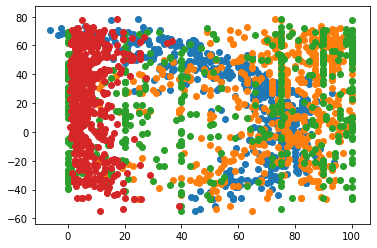

In [11]:
# Plot data
plt.title("Maximum Temperature vs. Latitude")
plt.xlabel("Maximum Temperature")
plt.ylabel("Latitude")
temp_plot = plt.scatter(max_temperatures, latitudes)
plt.savefig('C:\\Users\\Thomas Byrne\\Documents\\GitHub\\python-api-challenge\\WeatherPy\\temp_chart.png')

plt.title("Humidity vs. Latitudes")
plt.xlabel("Humidity (Percentage)")
plt.ylabel("Latitudes")
hum_plot = plt.scatter(humidities, latitudes)
plt.savefig('C:\\Users\\Thomas Byrne\\Documents\\GitHub\\python-api-challenge\\WeatherPy\\humid_chart.png')

plt.title("Cloudiness vs. Latitudes")
plt.xlabel("Cloudiness (Percent)")
plt.ylabel("Latitudes")
clod_plot = plt.scatter(cloudinesses, latitudes)
plt.savefig('C:\\Users\\Thomas Byrne\\Documents\\GitHub\\python-api-challenge\\WeatherPy\\cloudy_chart.png')

plt.title("Wind Speed (MPH) vs. Latitudes")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Latitudes")
wind_plot = plt.scatter(wind_speeds, latitudes)
plt.savefig('C:\\Users\\Thomas Byrne\\Documents\\GitHub\\python-api-challenge\\WeatherPy\\wind_chart.png')